# WeatherPy
----

#### Note
* Directory information is used to identify current working directory and to change directories and locate personal API keys fro analysis

In [1]:
import os
orig_working_directory=os.getcwd()
orig_working_directory

'C:\\Users\\clemi\\Desktop\\Clementine-GWU-HW\\Python_APIs_and_Sentiment_Analysis\\WeatherPy\\starter_code'

In [2]:
os.chdir(os.path.join('..','..','..'))
curr_working_directory=os.getcwd()
curr_working_directory

'C:\\Users\\clemi\\Desktop\\Clementine-GWU-HW'

In [3]:
#Installing citipy to determin city based on latitude and longitude which will be used below
#!pip install citipy

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Select range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [6]:
cities

['conceicao do araguaia',
 'mataura',
 'kapaa',
 'pevek',
 'chokurdakh',
 'punta arenas',
 'port elizabeth',
 'qaanaaq',
 'tasiilaq',
 'ushuaia',
 'toamasina',
 'bengkulu',
 'zeya',
 'mar del plata',
 'dikson',
 'talnakh',
 'ribeira grande',
 'hermanus',
 'aksarka',
 'crateus',
 'bolungarvik',
 'hamilton',
 'cape town',
 'puerto ayora',
 'rockford',
 'shingu',
 'norman wells',
 'rapid valley',
 'russell',
 'busselton',
 'midland',
 'gebre guracha',
 'north bend',
 'tommot',
 'tiksi',
 'husavik',
 'djambala',
 'saint george',
 'port alfred',
 'saint-philippe',
 'narsaq',
 'nantucket',
 'saldanha',
 'chagda',
 'shelabolikha',
 'tsihombe',
 'arraial do cabo',
 'coquimbo',
 'vao',
 'taolanaro',
 'dibaya',
 'tuktoyaktuk',
 'albany',
 'khorinsk',
 'izumo',
 'chimbote',
 'ocampo',
 'nikolskoye',
 'gamba',
 'nuevo progreso',
 'georgetown',
 'alvaraes',
 'jamestown',
 'anadyr',
 'santa cruz',
 'milingimbi',
 'kollumerland',
 'esperance',
 'constitucion',
 'carnarvon',
 'vaini',
 'sandwick',
 'r

### Perform API Calls
* Performing a weather check on each city using a series of successive API calls.
* Including a print log of each city as it is being processed (with the city number and city name).


In [7]:
#Printing log
print("Beginning Data Retrieval")
print("------------------------")

x=0
i=1
for city in cities:
    try:
        x+=1
        print(f"Processing Record {x} of Set{i} | {city}")
        if x==50:
            x=0
            i+=1
            
    except:    
        print("City not found. Skipping...")

print("-------------------------")        
print("Data Retreival Complete")     
print("-------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set1 | conceicao do araguaia
Processing Record 2 of Set1 | mataura
Processing Record 3 of Set1 | kapaa
Processing Record 4 of Set1 | pevek
Processing Record 5 of Set1 | chokurdakh
Processing Record 6 of Set1 | punta arenas
Processing Record 7 of Set1 | port elizabeth
Processing Record 8 of Set1 | qaanaaq
Processing Record 9 of Set1 | tasiilaq
Processing Record 10 of Set1 | ushuaia
Processing Record 11 of Set1 | toamasina
Processing Record 12 of Set1 | bengkulu
Processing Record 13 of Set1 | zeya
Processing Record 14 of Set1 | mar del plata
Processing Record 15 of Set1 | dikson
Processing Record 16 of Set1 | talnakh
Processing Record 17 of Set1 | ribeira grande
Processing Record 18 of Set1 | hermanus
Processing Record 19 of Set1 | aksarka
Processing Record 20 of Set1 | crateus
Processing Record 21 of Set1 | bolungarvik
Processing Record 22 of Set1 | hamilton
Processing Record 23 of Set1 | cape town
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#Creating lists to hold specific information to be collected from API calls to be stored in CSV
name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

In [13]:
#calling working directory
import os
curr_working_directory=os.getcwd()
curr_working_directory

'C:\\Users\\clemi\\Desktop\\Clementine-GWU-HW'

In [14]:
# Import API key
from api_keys import weather_api_key

In [15]:
#calling weather API in units metric
url="http://api.openweathermap.org/data/2.5/weather?"
units='metric'
query_url=f"{url}appid={weather_api_key}&units={units}&q="
response=requests.get(query_url+city).json()
response  

{'coord': {'lon': 127.67, 'lat': 26.12},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 27.22,
  'feels_like': 31.17,
  'temp_min': 26.67,
  'temp_max': 28,
  'pressure': 1012,
  'humidity': 94},
 'visibility': 10000,
 'wind': {'speed': 4.6, 'deg': 200},
 'clouds': {'all': 40},
 'dt': 1590881098,
 'sys': {'type': 1,
  'id': 8137,
  'country': 'JP',
  'sunrise': 1590871054,
  'sunset': 1590920208},
 'timezone': 32400,
 'id': 1861280,
 'name': 'Itoman',
 'cod': 200}

In [16]:
#pulling out keys/ information needed to create csv. Cities that are not found in the API are skipped and printed out so 
#they can be identified

for city in cities:
    try:
        response=requests.get(query_url+city).json()
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except KeyError:
        print(f"city {city} not found")
        pass

city bolungarvik not found
city chagda not found
city tsihombe not found
city taolanaro not found
city dibaya not found
city milingimbi not found
city kollumerland not found
city doctor pedro p. pena not found
city zhitikara not found
city macaboboni not found
city attawapiskat not found
city palabuhanratu not found
city sinkat not found
city illoqqortoormiut not found
city dzhusaly not found
city barentsburg not found
city marcona not found
city tubruq not found
city belushya guba not found
city mys shmidta not found
city sentyabrskiy not found
city umzimvubu not found
city ruatoria not found
city upplands-vasby not found
city nizhneyansk not found
city balykshi not found
city astipalaia not found
city hihifo not found
city samusu not found
city silyanah not found
city amderma not found
city vaitupu not found
city gurgan not found
city nguiu not found
city kazalinsk not found
city toliary not found
city rawannawi not found
city lolua not found
city samalaeulu not found
city grand rive

In [17]:
#creating a dictionary to hold information pulled from Try and Except that were appended to the respective lists
weather_dict={
    "City":name,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date
}

In [19]:
#creating a DataFram from weather_dict using pandas and exploring the data
city_weather_df=pd.DataFrame(weather_dict)
city_weather_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [20]:
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Conceição do Araguaia,-8.26,-49.26,27.00,78,64,1.50,BR,1590881558
1,Mataura,-46.19,168.86,9.77,58,46,0.97,NZ,1590881558
2,Kapaa,22.08,-159.32,27.78,69,40,6.70,US,1590881558
3,Pevek,69.70,170.31,5.16,69,12,7.86,RU,1590881559
4,Chokurdakh,70.63,147.92,6.84,60,100,1.98,RU,1590881559


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
#Exploring the new DataFrame to determine if there are any records where humidity>100
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,19.681190,15.325052,18.503155,71.375862,50.634483,3.510862,1.590882e+09
std,33.239178,91.769083,8.038695,19.425606,36.771772,2.248818,5.802157e+01
min,-54.800000,-175.200000,-5.270000,12.000000,0.000000,0.130000,1.590881e+09
25%,-8.170000,-65.877500,12.145000,59.750000,13.750000,1.725000,1.590882e+09
50%,22.895000,19.130000,19.000000,75.000000,54.000000,3.100000,1.590882e+09
75%,48.140000,101.567500,25.187500,86.250000,87.250000,4.920000,1.590882e+09
max,78.220000,179.320000,38.000000,100.000000,100.000000,14.400000,1.590882e+09


No records are displayed where Humidity>100 but code will be written to handle this in the eventuality that any record with these properties should arise because the cityweather data is randomly generated.

In [23]:
# Get the indices of cities that have humidity over 100%.
#If there are no records where Humidity>100, the "select_indices" list will be empty
select_indices = list(np.where(city_weather_df['Humidity']>100)[0])
select_indices

[]

In [25]:
#If there are no records where Humidity>100, the DatFrame will be empty
city_weather_df.iloc[select_indices]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_df.drop(select_indices,inplace=False)

In [27]:
#confirm the rows were dropped
#Nothing will be dropped if there are no records where Humidity>100
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,19.681190,15.325052,18.503155,71.375862,50.634483,3.510862,1.590882e+09
std,33.239178,91.769083,8.038695,19.425606,36.771772,2.248818,5.802157e+01
min,-54.800000,-175.200000,-5.270000,12.000000,0.000000,0.130000,1.590881e+09
25%,-8.170000,-65.877500,12.145000,59.750000,13.750000,1.725000,1.590882e+09
50%,22.895000,19.130000,19.000000,75.000000,54.000000,3.100000,1.590882e+09
75%,48.140000,101.567500,25.187500,86.250000,87.250000,4.920000,1.590882e+09
max,78.220000,179.320000,38.000000,100.000000,100.000000,14.400000,1.590882e+09


In [30]:
#Identifying working directory to identify folder to save csv file to
os.chdir(orig_working_directory)
orig_working_directory

'C:\\Users\\clemi\\Desktop\\Clementine-GWU-HW\\Python_APIs_and_Sentiment_Analysis\\WeatherPy\\starter_code'

In [31]:
os.chdir(os.path.join('..'))
os.getcwd()

'C:\\Users\\clemi\\Desktop\\Clementine-GWU-HW\\Python_APIs_and_Sentiment_Analysis\\WeatherPy'

In [32]:
# Export the City_Data into a csv
clean_city_data.to_csv('output_data/City_Data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
#clean_city_data

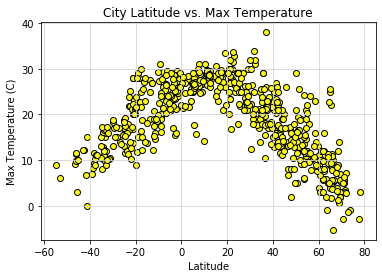

In [33]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"],edgecolors="black",facecolors="yellow")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Images/lat_vs_temp.png")
plt.show()

The above plot is showing the relationship between Latitude and Max Temperature for each city in our data set. The positive latitudes (latitude >=0) represent latitudes in the northern hemisphere with zero being the equator. The further north we go from the equator, the lower the Max Temperature and the further south we move from the equator, the lower the Max temperature.

## Latitude vs. Humidity Plot

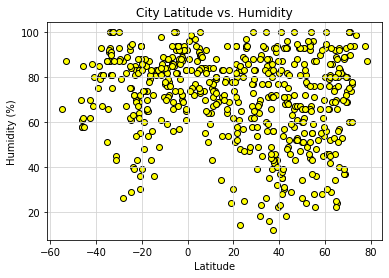

In [34]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],edgecolors="black",facecolors="yellow")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Images/lat_vs_humidity.png")
plt.show()

The code above is plotting the relationship between the latitudes of each city in our data set and the percent humidity at those latitudes.Closer to the equator, minimum humidity in 50% or greater. Farther from the equator, in either direction, humidity ranges anywhere from 0 to 100%.

## Latitude vs. Cloudiness Plot

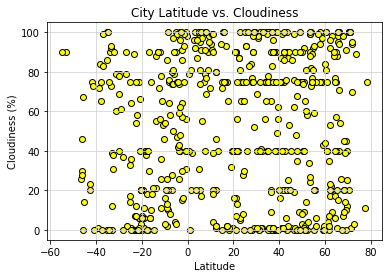

In [35]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"],edgecolors="black",facecolors="yellow")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Images/lat_vs_cloudiness.png")
plt.show()

The code above plots the the relationship between latitude of each city in our data set and cloudiness. There is no apparent relationship between the two.

## Latitude vs. Wind Speed Plot

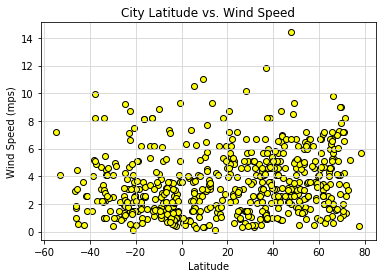

In [36]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],edgecolors="black",facecolors="yellow")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
#unit is in meters per second
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Images/lat_vs_windspeed.png")
plt.show()

The code above plots the relationship between the latitude of each city in our dataset and the coreponding windspeed at that latitude. Majority of the winspeeds are less than 10 meters per second accross all the latitudes but a few cities in the northern hemisphere have wind speeds greater than 10 meters per second

## Linear Regression

#### Note
Because the data is sourced from a random generator, r-squared values and relations expressed by the regression line change every time the script is re-run which is why no numbers were included in the observations comparing graphs measuring the same weather characteristic.

In [38]:
#Create a function to create Linear Regression plots
from scipy.stats import linregress

In [39]:
# Create Northern and Southern Hemisphere DataFrames
northern=clean_city_data.loc[clean_city_data['Lat']>=0]
southern=clean_city_data.loc[clean_city_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-squared is:-0.8165490528699387


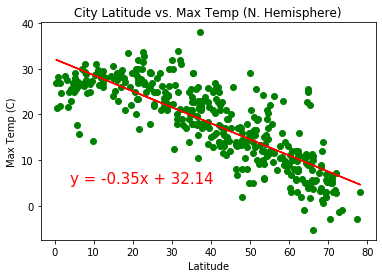

In [40]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Lat"], northern["Max Temp"])
regress_values = northern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern["Lat"],northern["Max Temp"],facecolors="green")
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(4,5),fontsize=15,color="red")

plt.title("City Latitude vs. Max Temp (N. Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"the r-squared is:{rvalue}")

plt.savefig("Images/north_max_temp.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-squared is:0.7622109232546702


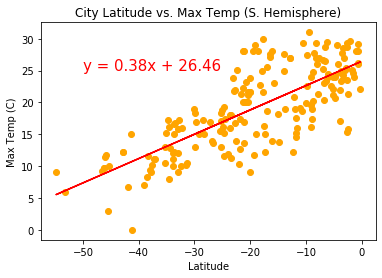

In [41]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Lat"], southern["Max Temp"])
regress_values = southern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern["Lat"],southern["Max Temp"],facecolors="orange")
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

plt.title("City Latitude vs. Max Temp (S. Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"the r-squared is:{rvalue}")

plt.savefig("Images/south_max_temp.png")
plt.show()



The two plots above explore the relationship between latitude and maximum temperature by hemisphere. At the Northern Hemisphere, there is a negative relationship between latitude and max temp. This implies that the further away we move from the equator towards the north pole, the lower the temperature. The r-square value at the Northern Hemisphere implies that the regression line fits worse than using a horizontal line. At the Southern Hemisphere, there is a positive relationship between latitude and max temperature. This implies that the closer you move towards the equator, the higher the max temp. The r-squared value is around indicates that the model explains the percentage variability of the response data around it's mean.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-squared is:-0.11266159344463811


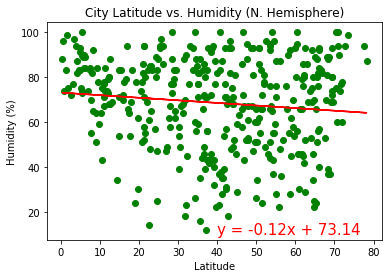

In [44]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Lat"],northern["Humidity"])
regress_values = northern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern["Lat"],northern["Humidity"],facecolors="green")
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

plt.title("City Latitude vs. Humidity (N. Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"the r-squared is:{rvalue}")

plt.savefig("Images/north_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-squared is:0.13357985157601718


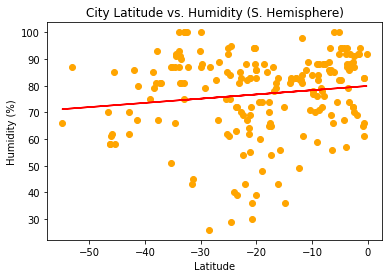

In [45]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Lat"],southern["Humidity"])
regress_values = southern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern["Lat"],southern["Humidity"],facecolors="orange")
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

plt.title("City Latitude vs. Humidity (S. Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"the r-squared is:{rvalue}")

plt.savefig("Images/south_humidity.png")
plt.show()

The two plots above explore the relationship between latitude and humidty by hemisphere. At the Northern Hemisphere, there is a positive relationship between latitude and humidity. This implies that the further away we move from the equator towards the north pole, the higher the humidity. The r-square value here implies that the model explains the percentage variability of the response data around it's mean. At the Southern Hemisphere, there is also a positive relationship between latitude and humidity. This implies that the closer you move towards the equator from the south pole, the higher the humidity. The r-squared value here explains the percentage variablity of the response data around it's mean.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-squared is:-0.091096212723168


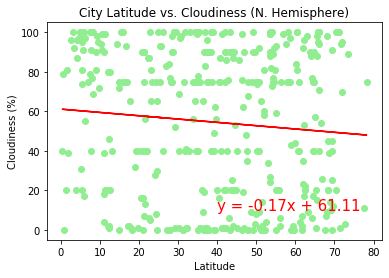

In [46]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Lat"],northern["Cloudiness"])
regress_values = northern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern["Lat"],northern["Cloudiness"],facecolors="lightgreen")
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

plt.title("City Latitude vs. Cloudiness (N. Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"the r-squared is:{rvalue}")

plt.savefig("Images/north_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-squared is:0.1414065174894181


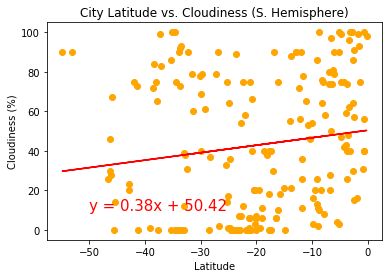

In [47]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Lat"],southern["Cloudiness"])
regress_values = southern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern["Lat"],southern["Cloudiness"],facecolors="orange")
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

plt.title("City Latitude vs. Cloudiness (S. Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"the r-squared is:{rvalue}")

plt.savefig("Images/south_cloudiness.png")
plt.show()

The two plots above explore the relationship between latitude and cloudiness by hemisphere. At the Northern Hemisphere, there is a positive relationship between latitude and cloudiness. This implies that the further away we move from the equator towards the north pole, the higher the cloudiness. The r-square value here implies that the model explains that percentage of the variability of the response data around it's mean. At the Southern Hemisphere, there is a negative relationship between latitude and cloudiness. This implies that the closer you move towards the equator from the south pole, the lower the cloudiness. The r-squared value here indicates that the regression line fits worse than using a horizontal line.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-squared is:0.14893755844128417


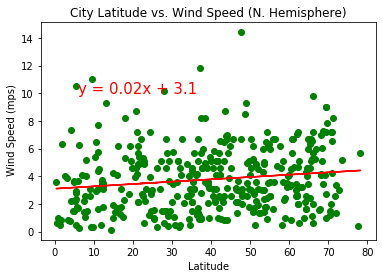

In [48]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Lat"],northern["Wind Speed"])
regress_values = northern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern["Lat"],northern["Wind Speed"],facecolors="green")
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("City Latitude vs. Wind Speed (N. Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel(" Wind Speed (mps)")
#unit in meters pers second
print(f"the r-squared is:{rvalue}")

plt.savefig("Images/north_wind_speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-squared is:-0.09878061784443457


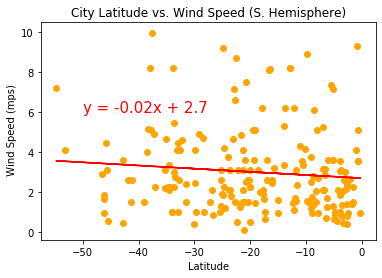

In [49]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Lat"],southern["Wind Speed"])
regress_values = southern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern["Lat"],southern["Wind Speed"],facecolors="orange")
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")

plt.title("City Latitude vs. Wind Speed (S. Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel(" Wind Speed (mps)")
#unit in meters per second
print(f"the r-squared is:{rvalue}")

plt.savefig("Images/south_wind_speed.png")
plt.show()

The two plots above explore the relationship between latitude and wind speed by hemisphere. At the Northern Hemisphere, there is a positive relationship between latitude and wind speed. This implies that the further away we move from the equator towards the north pole, the higher the wind speed. The r-square value here implies that the model explains about that percentage of the variability of the response data around it's mean. At the Southern Hemisphere, there is a negative relationship between latitude and wind speed. This implies that the closer you move towards the equator from the south pole, the lower the windspeed. The r-squared value here indicates that the regression line fits worse than using a horizontal line